In [6]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df = pd.read_csv('../../data/raw/miningprocess_flotation_plant_database.csv.zip',parse_dates=['date'] )

In [36]:
def correct_data(df,end_date):
    
    # get a series of unique hourly timestamps in the dataset

    hours = pd.Series(df['date'].unique())

    hours.index = hours
    
    # create a date range of 20s intervals fro, first date to last hour logged

    date_range = pd.date_range(start=df.iloc[0,0], end=end_date, freq='20S')
    
    # remove first couple observations from EDA - dataset specific

    date_range = date_range[6:]
    
    # create lists from both the hours series and the new datetime index

    hours_list = hours.index.format()

    seconds_list = date_range.format()
    
    new_index = []

    for idx in seconds_list:

        if (idx[:13] + ':00:00') in hours_list:

            new_index.append(idx)

    #remove the one missing interval within the hour which we found in EDA

    new_index.remove('2017-04-10 00:00:00')
    
    df['datetime_seconds'] = pd.to_datetime(new_index)

    df.rename(columns={'date': 'datetime_hours'}, inplace=True)
    
    # ensure all columns have the same data type of float
    
    dct = df.dtypes.to_dict()

    for i in dct.keys():

        if dct[i] == 'object':

            df[i] = df[i].str.replace(',','.').astype('float')
    
    return df

In [37]:
df = correct_data(df,'2017-09-09 23:59:40')

<IPython.core.display.Javascript object>


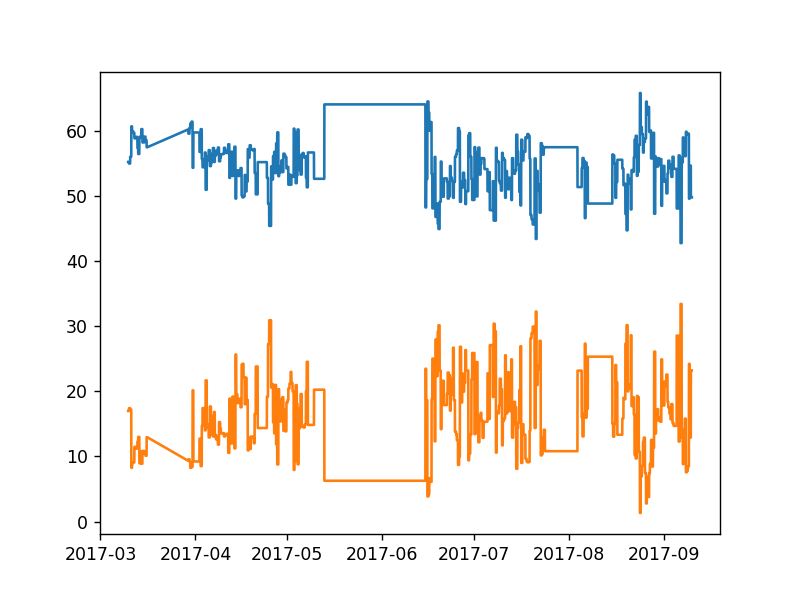

In [42]:
plt.figure(1)
plt.plot(df['datetime_seconds'],df['% Iron Feed'])
plt.plot(df['datetime_seconds'],df['% Silica Feed'])
plt.show()

In [10]:
# # save data to compressed csv in processed folder

# df = correct_dates(df,'2017-09-09 23:59:40')

# df.to_csv('../../data/processed/miningprocess_flotation_plant_database_datetime_corrected.csv.gz'\
#            ,compression="gzip",index=False)